C:\Users\Hi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:36:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


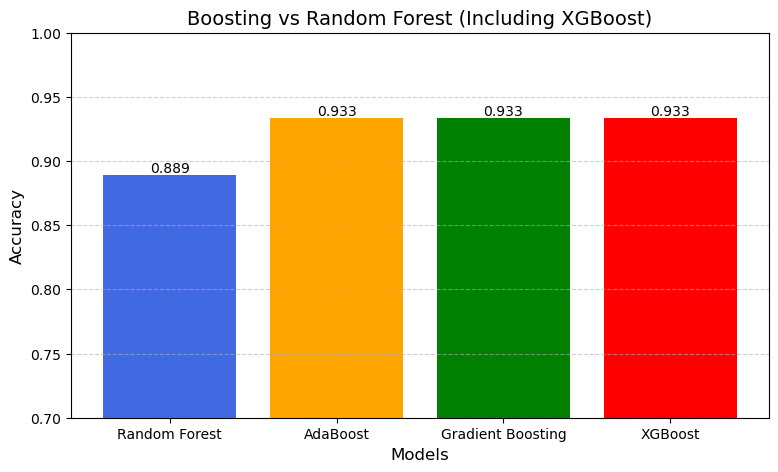

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42, stratify=y
)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(
 n_estimators=100,
 learning_rate=0.1,
 max_depth=3,
 random_state=42,
 use_label_encoder=False,
 eval_metric='mlogloss'
)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
ada_pred = ada_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
ada_acc = accuracy_score(y_test, ada_pred)
gb_acc = accuracy_score(y_test, gb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
models = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracies = [rf_acc, ada_acc, gb_acc, xgb_acc]
plt.figure(figsize=(9, 5))
plt.bar(models, accuracies, color=['royalblue', 'orange', 'green', 'red'])
plt.title("Boosting vs Random Forest (Including XGBoost)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.7, 1.0)
for i, acc in enumerate(accuracies):
 plt.text(i, acc + 0.002, f"{acc:.3f}", ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()